#  One way ANOVA 


This notebook is intended to demonstrate the application of the one way ANOVA analysis on a built in R data set: **PlantGrowth**

In [1]:
# Getting the data set and having a peek into its content
help(PlantGrowth)
PlantGrowth

weight,group
4.17,ctrl
5.58,ctrl
5.18,ctrl
6.11,ctrl
4.50,ctrl
4.61,ctrl
5.17,ctrl
4.53,ctrl
5.33,ctrl
5.14,ctrl


We will now use the `summary` functon to get more information about the whole data set

In [2]:
# Getting a basic summary of the data
summary(PlantGrowth)

     weight       group   
 Min.   :3.590   ctrl:10  
 1st Qu.:4.550   trt1:10  
 Median :5.155   trt2:10  
 Mean   :5.073            
 3rd Qu.:5.530            
 Max.   :6.310            

You can also get statistical information on a single attribute of the data

In [3]:
# Computing the SD of a given attribute 
sd(PlantGrowth$weight)

[1] 0.7011918

Or per groups within the data set

In [4]:
# Compute the sd of each group for the given attribute
tapply(PlantGrowth$weight, PlantGrowth$group, sd)

ctrl      trt1      trt2 
0.5830914 0.7936757 0.4425733

The next thing we will do is creating a boxplot of the data set (as in the main Tutorial).

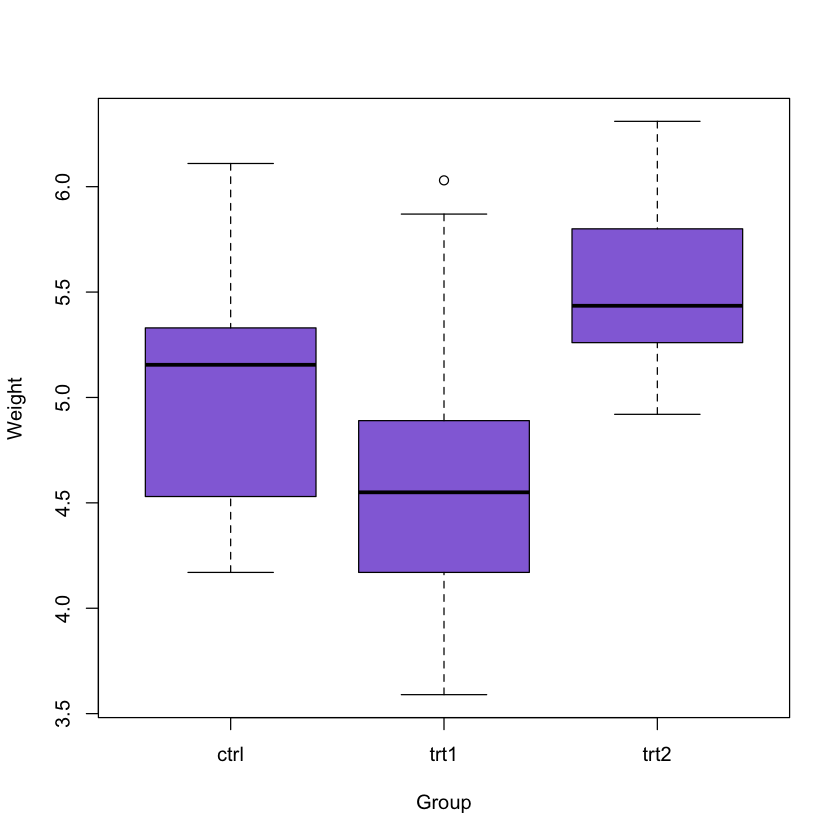

In [9]:
boxplot(weight ~ group, data =  PlantGrowth, col = 'mediumpurple', 
        xlab = 'Group', ylab = 'Weight')

We can also create histograms of the data. In this case we will use the lattice plotting system:

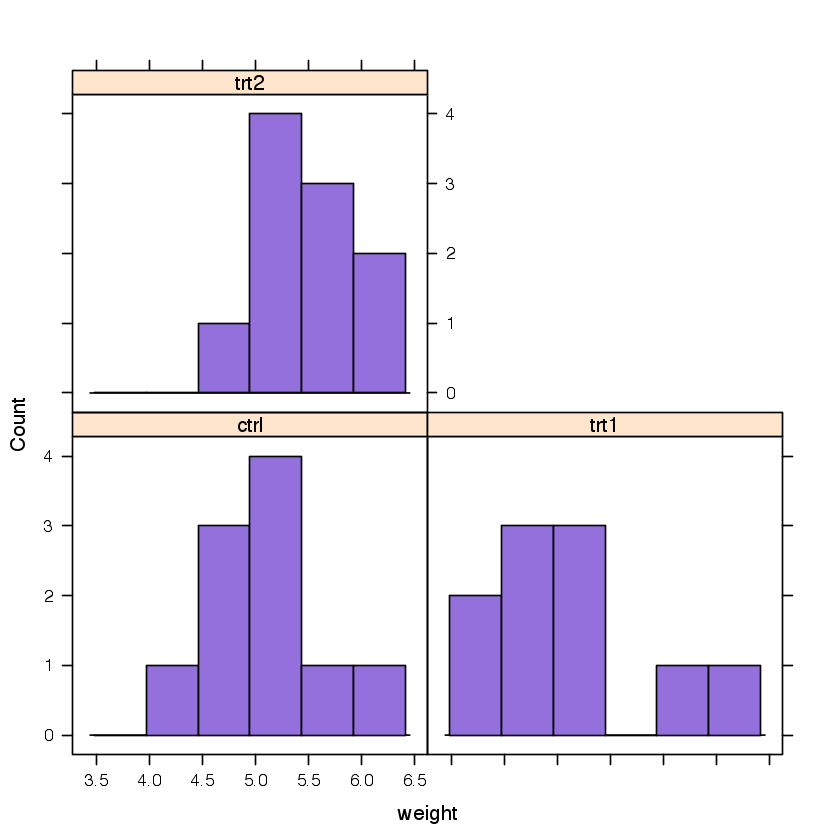

In [4]:
# Creating a conditional histogram of the data
par(mfrow =  c(1,3))

# We will use the lattice plotting system 
library(lattice)

# Creating the histogram
histogram(~weight | group, data =  PlantGrowth, col = 'mediumpurple', type = 'count')

** Our  null hypotesis is that the three groups have the same growth mean**

First we will use a completely randomized design one-way ANOVA

In [5]:
# One way ANOVA (Randomized design)
analysis <- aov(weight ~ group, data = PlantGrowth)
summary(analysis)

            Df Sum Sq Mean Sq F value Pr(>F)  
group        2  3.766  1.8832   4.846 0.0159 *
Residuals   27 10.492  0.3886                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Now we will build a linear model with `lm()` and will then use the `anova()` command to analyse the fit 

In [6]:
fit <- lm(weight ~ group, data = PlantGrowth)
anova(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
group,2,3.76634,1.8831700,4.846088,0.01590996
Residuals,27,10.49209,0.3885959,NA,NA


As expected, both approaches provide the same results!